In [628]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import math
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

#warnings.filterwarnings('ignore')

In [629]:
df = pd.read_excel('C://Users//fergu//table_8_offenses_known_to_law_enforcement_new_york_by_city_2013 - Copy.xls')

In [630]:
df.head()

,Adams Village,1861,0,0.1,Unnamed: 4,0.2,0.3,0.4,12,2,10,0.5,0.6
0,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
1,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
2,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
3,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
4,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan


In [631]:
df.columns = ['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery', 'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3']
df.head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
0,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
1,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
2,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
3,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
4,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan


In [632]:
df.shape

(347, 13)

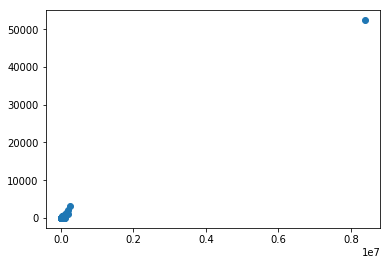

In [633]:
plt.scatter(x='population', y='violent', data=df)

In [634]:
df.population.max()

8396126

In [635]:
#df.city[30]
list(df['population']).index(8396126)
df.iloc[215, :]

city          New York
population     8396126
violent          52384
murder             335
rape1              NaN
rape2             1112
robbery          19170
ag_aslt          31767
property        141971
burglary         16606
larce-th        117931
motor_th          7434
arson3             NaN
Name: 215, dtype: object

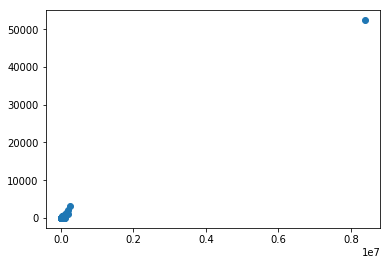

In [636]:
plt.scatter(x='population', y='violent', data=df)

In [637]:
dfex = df.drop(215, axis=0)

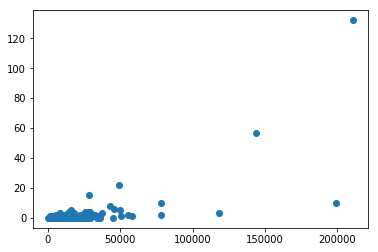

In [638]:
plt.scatter(x='population', y='arson3', data=dfex)

In [639]:
df.isnull().sum()

city            0
population      0
violent         0
murder          0
rape1         347
rape2           0
robbery         0
ag_aslt         0
property        0
burglary        0
larce-th        0
motor_th        0
arson3        161
dtype: int64

In [640]:
df.arson3.describe()

count   186.000
mean      1.882
std      10.721
min       0.000
25%       0.000
50%       0.000
75%       1.000
max     132.000
Name: arson3, dtype: float64

In [641]:
dfex2 = dfex.drop('rape1', axis=1)

In [642]:
dfex2.head()

,city,population,violent,murder,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
0,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
1,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
2,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan
3,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan
4,Alfred Village,4089,5,0,0,3,2,46,10,36,0,nan


In [643]:
dfex2['population^2'] = dfex2['population'] * dfex2['population']
dfex2.head()

,city,population,violent,murder,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3,population^2
0,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929
1,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716
2,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan,9595377936
3,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan,40806544
4,Alfred Village,4089,5,0,0,3,2,46,10,36,0,nan,16719921


In [644]:
dfex2.reset_index(inplace=True)
dfex2['murder_b'] = [1 if dfex2['murder'][i] > 0 else 0 for i in range(0, len(dfex2['murder']))]
dfex2['robbery_b'] = [1 if dfex2['robbery'][i] > 0 else 0 for i in range(0, len(dfex2['robbery']))]
dfex2['motor_th_b'] = [1 if dfex2['motor_th'][i] > 0 else 0 for i in range(0, len(dfex2['motor_th']))]
dfex2.head()

,index,city,population,violent,murder,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3,population^2,murder_b,robbery_b,motor_th_b
0,0,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929,0,0,1
1,1,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716,0,0,0
2,2,Albany,97956,791,8,30,227,526,4090,705,3243,142,nan,9595377936,1,1,1
3,3,Albion Village,6388,23,0,3,4,16,223,53,165,5,nan,40806544,0,1,1
4,4,Alfred Village,4089,5,0,0,3,2,46,10,36,0,nan,16719921,0,1,0


### Create model initially using suggested variables

The starting point for this analysis will be the variables given in binary form.

In [645]:
regr = linear_model.LinearRegression()
Y = dfex2['property'].values.reshape(-1,1)
x = ['population^2', 'murder_b', 'robbery_b', 'motor_th_b']
X = dfex2[x]
regr.fit(X, Y)

print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared: ', regr.score(X, Y))

Coefficients 
 [[  1.70372198e-07   3.62939794e+02   1.85431131e+02   7.31395653e+01]]
Intercept 
 [ 2.87366338]
R-squared:  0.828970689783


In [646]:
### Use linear population, non-binary input variables:

In [647]:
regr = linear_model.LinearRegression()
Y = dfex2['property'].values.reshape(-1,1)
x = ['population', 'murder', 'robbery', 'motor_th']
X = dfex2[x]
regr.fit(X, Y)

print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared: ', regr.score(X, Y))

Coefficients 
 [[  1.36803292e-02   9.30858464e+01  -4.64084591e+00   1.15210115e+01]]
Intercept 
 [ 26.12504215]
R-squared:  0.941678948136


In [648]:
Y = dfex2['property'].values.reshape(-1,1)
x = ['population^2', 'burglary', 'ag_aslt', 'violent']
X = dfex2[x]
regr.fit(X, Y)

print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared: ', regr.score(X, Y))

Coefficients 
 [[  5.46060733e-08   4.54327285e+00   7.55065193e+00  -5.99936539e+00]]
Intercept 
 [ 84.50248216]
R-squared:  0.964784727114


### Settle on this combination of variables:

In [649]:
regr = linear_model.LinearRegression()
Y = dfex2['property'].values.reshape(-1,1)
x = ['population', 'violent', 'larce-th', 'burglary']
X = dfex2[x]
regr.fit(X, Y)

print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared: ', regr.score(X, Y))

Coefficients 
 [[  1.94251531e-04   1.75869022e-01   9.85761449e-01   1.11712715e+00]]
Intercept 
 [-1.7212384]
R-squared:  0.999919720096


### Create binary variables for these and try those also

In [650]:
dfex2.reset_index(inplace=True)
dfex2['violent_b'] = [1 if dfex2['violent'][i] > 0 else 0 for i in range(0, len(dfex2['violent']))]
dfex2['larce-th_b'] = [1 if dfex2['larce-th'][i] > 0 else 0 for i in range(0, len(dfex2['larce-th']))]
dfex2['burglary_b'] = [1 if dfex2['burglary'][i] > 0 else 0 for i in range(0, len(dfex2['burglary']))]

In [651]:
Y = dfex2['property'].values.reshape(-1,1)
x = ['population', 'violent_b', 'larce-th_b', 'burglary_b']
X = dfex2[x]
regr.fit(X, Y)

print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared: ', regr.score(X, Y))

Coefficients 
 [[  3.41853966e-02  -7.55122925e+01   1.65614048e+01  -8.48321293e+01]]
Intercept 
 [-31.98882136]
R-squared:  0.788458133036


### Final choice: Population, Violent Crime, Larceny-Theft, Burglary 

The previous set of variables gave a very high R-Squared value. Now to test this model for validity according to the main assumptions of multi-variable linear regression: linear variation, multivariate normality, homoscedasticity, and low multi-collinearity. 

1a. NYC property crime



In [652]:
NYC_values = df.loc[215, ['population','violent', 'larce-th', 'burglary']]
NYC_actual = df.loc[215, 'property']
NYC_actual
#NYC_predicted = regr.predict(NYC_values).reshape(1,-1)

#print('The predicted level of property crime in NYC based on the model is {}, whereas the actual number is {}'.format(NYC_predicted, NYC_actual))

141971

#### 1. Linear variation
The below plots clearly show that the assumption of a linear relationship between each of the input variables and the outcome variable is a valid one. 

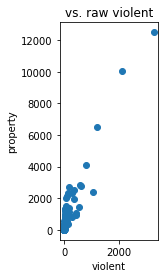

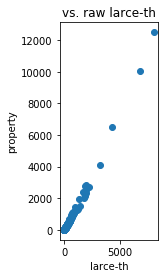

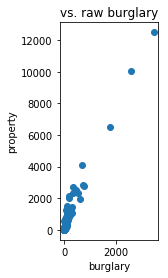

In [653]:
x = ['population', 'violent', 'larce-th', 'burglary']
X = dfex2[x]
for i in range(1, len(x)):
    plt.subplot(1,3,i)
    plt.scatter(dfex2[x[i]], Y)
    plt.xlabel(x[i])
    plt.ylabel('property')
    plt.title('vs. raw ' + x[i])
    plt.show()

#### 2. Multivariate normality

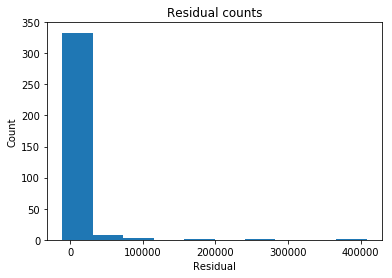

In [654]:
predicted = regr.predict(X).ravel()
actual = dfex2['property']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Clearly the distribution of errors is non-normal. So we re-run the model using log input variables and log outcome variable, as shown below:

In [655]:
dfex3 = dfex2.copy()
# Since some of the values are zero, we must convert the zeros to v. small nos:
for col in dfex2.columns:
    dfex3[col]= [2.718 if dfex3[col][i] == 0 else dfex3[col][i] for i in range(0, len(dfex3[col]))]

In [656]:
# Define the log columns:

dfex3['violent_log'] = [np.log(dfex3['violent'][i]) for i in range(0, len(dfex3['violent']))]
dfex3['larce-th_log'] = [np.log(dfex3['larce-th'][i]) for i in range(0, len(dfex3['larce-th']))]
dfex3['burglary_log'] = [np.log(dfex3['burglary'][i]) for i in range(0, len(dfex3['burglary']))]
dfex3['pop_log'] = [np.log(dfex3['population'][i]) for i in range(0, len(dfex3['population']))]
dfex3['property_log'] = [np.log(dfex3['property'][i]) for i in range(0, len(dfex3['property']))]
dfex3.head(1)

,level_0,index,city,population,violent,murder,rape2,robbery,ag_aslt,property,...,robbery_b,motor_th_b,violent_b,larce-th_b,burglary_b,violent_log,larce-th_log,burglary_log,pop_log,property_log
0,2.718,2.718,Addison Town and Village,2577,3.000,2.718,2.718,2.718,3.000,24.000,...,2.718,1.000,1.000,1.000,1.000,1.099,2.996,1.099,7.854,3.178


##### Re-run the model for the log variables

In [657]:
Y2 = dfex3['property_log'].values.reshape(-1,1)
x2 = ['pop_log', 'violent_log', 'larce-th_log', 'burglary_log']
X2 = dfex3[x2]
regr.fit(X2, Y2)

print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared: ', regr.score(X2, Y2))

Coefficients 
 [[-0.00321574 -0.02625507  0.90793993  0.14121834]]
Intercept 
 [ 0.29797293]
R-squared:  0.994800918678


Repeating this with the log values does not seem to help:

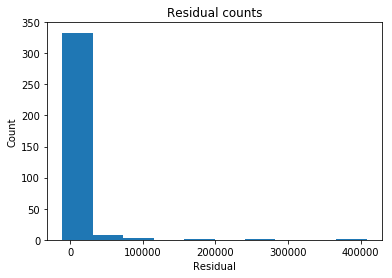

In [658]:
predicted2 = regr.predict(X2).ravel()
actual2 = dfex3['property_log']
residual2 = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#### 3. Homoscedasticity

The below shows a highly heteroscedastic error distribution for the raw error values.

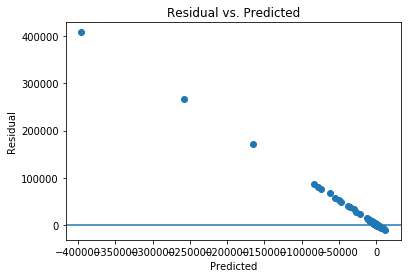

In [659]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

##### Try heteroscedasticity plot for log values

This also does not seem to have helped:

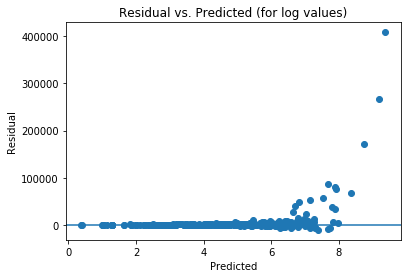

In [660]:
plt.scatter(predicted2, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted (for log values)')
plt.show()

#### 4. Low multi-collinearity
CLearly the chosen output variables have a high degree of inter-correlation. However, the main aim of this exercise is the generate a predictive model, without regard for explaining the model or which of its parts are most influential on the outcome.

In [661]:
corrmat = X.corr()
corrmat

,population,violent,larce-th,burglary
population,1.000,0.830,0.901,0.820
violent,0.830,1.000,0.913,0.971
larce-th,0.901,0.913,1.000,0.950
burglary,0.820,0.971,0.950,1.000


##### Try again using log values

Clearly here there is a lower level of correlation for the log values, so the log-based model is preferable here.

In [662]:
corrmat2 = X2.corr()
corrmat2

,pop_log,violent_log,larce-th_log,burglary_log
pop_log,1.000,0.771,0.863,0.835
violent_log,0.771,1.000,0.799,0.867
larce-th_log,0.863,0.799,1.000,0.906
burglary_log,0.835,0.867,0.906,1.000
